In [1]:
# Dependencies
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import stats
import numpy as np

In [2]:
# Read in Affinity, COVID-19, and GeoID Data
affinity_nat_df = pd.read_csv('Data/Affinity-National-Daily.csv')
affinity_state_df = pd.read_csv('Data/Affinity-State-Daily.csv')
covid_nat_df = pd.read_csv('Data/COVID_Cases-National-Daily.csv')
covid_state_df = pd.read_csv('Data/COVID_Cases-State-Daily.csv')
geoids_df = pd.read_csv('Data/GeoIDs-State.csv')

In [3]:
#affinity_nat_dff.count()
#affinity_state_dff.count()
#covid_nat_df.count()
#covid_state_df.count()
geoids_df.count()

statefips        51
statename        51
stateabbrev      51
state_pop2019    51
dtype: int64

In [4]:
# check data types
geoids_df.dtypes

statefips         int64
statename        object
stateabbrev      object
state_pop2019     int64
dtype: object

In [58]:
# Create an date variable based on year, month, and day variables
affinity_nat_date = pd.to_datetime(affinity_nat_df[['year', 'month', 'day']])
affinity_nat_date.head()

0   2020-01-24
1   2020-01-25
2   2020-01-26
3   2020-01-27
4   2020-01-28
dtype: datetime64[ns]

In [6]:
# add date column and create a national state id and name in covid_nat_df
# also organize columns
affinity_nat_df["date"] = affinity_nat_date
affinity_nat_df["statefips"] = 0
affinity_nat_df["statename"] = 'National'
affinity_nat_df = affinity_nat_df[ ['date','year','month','day','statefips','statename','spend_acf','spend_aer',
                                   'spend_all','spend_all_inchigh','spend_all_inclow','spend_all_incmiddle','spend_apg',
                                   'spend_grf','spend_hcs','spend_tws'] ]
affinity_nat_df.head()

,date,year,month,day,statefips,statename,spend_acf,spend_aer,spend_all,spend_all_inchigh,spend_all_inclow,spend_all_incmiddle,spend_apg,spend_grf,spend_hcs,spend_tws
0,2020-01-24,2020,1,24,0,National,-0.00510,-0.02360,-0.006440,-0.005790,-0.00752,-0.00654,-0.00952,-0.00954,-0.00328,-0.005840
1,2020-01-25,2020,1,25,0,National,0.00202,-0.01820,0.000432,-0.000625,-0.00201,0.00199,0.00400,0.00991,-0.00469,0.000839
2,2020-01-26,2020,1,26,0,National,-0.00896,-0.02220,-0.002710,-0.000425,-0.00668,-0.00315,0.00152,0.01920,-0.00647,0.002720
3,2020-01-27,2020,1,27,0,National,-0.01350,-0.00762,-0.012200,-0.011000,-0.01590,-0.01190,-0.00671,-0.00980,-0.00755,-0.015700
4,2020-01-28,2020,1,28,0,National,-0.01550,-0.01270,-0.013700,-0.013300,-0.01630,-0.01320,-0.00492,-0.01820,-0.00243,-0.009870


In [7]:
# Create an date variable
covid_nat_date = pd.to_datetime(covid_nat_df[['year', 'month', 'day']])
covid_nat_date.head()

0   2020-01-21
1   2020-01-22
2   2020-01-23
3   2020-01-24
4   2020-01-25
dtype: datetime64[ns]

In [49]:
# add date column and create a national state id and name in covid_nat_df
covid_nat_df["date"] = covid_nat_date
covid_nat_df["statefips"] = 0
covid_nat_df["statename"] = 'National'
covid_nat_df = covid_nat_df[ ['date','year','month','day','statefips','statename','case_rate','new_case_rate'] ]
covid_nat_df.head()

,date,year,month,day,statefips,statename,case_rate,new_case_rate
0,2020-01-21,2020,1,21,0,National,0.000305,.
1,2020-01-22,2020,1,22,0,National,0.000305,.
2,2020-01-23,2020,1,23,0,National,0.000305,.
3,2020-01-24,2020,1,24,0,National,0.000609,.
4,2020-01-25,2020,1,25,0,National,0.000914,.


In [9]:
# Merge national covid-19 data with national affinity (spending) data
merge0_df = pd.merge(covid_nat_df, affinity_nat_df, on=["date", "statefips"], how="left")
merge0_df.head()

,date,year_x,month_x,day_x,statefips,statename_x,case_rate,new_case_rate,year_y,month_y,...,spend_acf,spend_aer,spend_all,spend_all_inchigh,spend_all_inclow,spend_all_incmiddle,spend_apg,spend_grf,spend_hcs,spend_tws
0,2020-01-21,2020,1,21,0,National,0.000305,.,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-01-22,2020,1,22,0,National,0.000305,.,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-01-23,2020,1,23,0,National,0.000305,.,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2020-01-24,2020,1,24,0,National,0.000609,.,2020.0,1.0,...,-0.00510,-0.0236,-0.006440,-0.005790,-0.00752,-0.00654,-0.00952,-0.00954,-0.00328,-0.005840
4,2020-01-25,2020,1,25,0,National,0.000914,.,2020.0,1.0,...,0.00202,-0.0182,0.000432,-0.000625,-0.00201,0.00199,0.00400,0.00991,-0.00469,0.000839


In [10]:
# Remove rows with missing data
merge0_df = merge0_df.dropna(how='any')
merge0_df.head()

,date,year_x,month_x,day_x,statefips,statename_x,case_rate,new_case_rate,year_y,month_y,...,spend_acf,spend_aer,spend_all,spend_all_inchigh,spend_all_inclow,spend_all_incmiddle,spend_apg,spend_grf,spend_hcs,spend_tws
3,2020-01-24,2020,1,24,0,National,0.000609,.,2020.0,1.0,...,-0.00510,-0.02360,-0.006440,-0.005790,-0.00752,-0.00654,-0.00952,-0.00954,-0.00328,-0.005840
4,2020-01-25,2020,1,25,0,National,0.000914,.,2020.0,1.0,...,0.00202,-0.01820,0.000432,-0.000625,-0.00201,0.00199,0.00400,0.00991,-0.00469,0.000839
5,2020-01-26,2020,1,26,0,National,0.001520,.,2020.0,1.0,...,-0.00896,-0.02220,-0.002710,-0.000425,-0.00668,-0.00315,0.00152,0.01920,-0.00647,0.002720
6,2020-01-27,2020,1,27,0,National,0.001520,0.000174,2020.0,1.0,...,-0.01350,-0.00762,-0.012200,-0.011000,-0.01590,-0.01190,-0.00671,-0.00980,-0.00755,-0.015700
7,2020-01-28,2020,1,28,0,National,0.001520,0.000174,2020.0,1.0,...,-0.01550,-0.01270,-0.013700,-0.013300,-0.01630,-0.01320,-0.00492,-0.01820,-0.00243,-0.009870


In [11]:
# Drop dup columns from merge
merge0_df.drop(['year_y', 'month_y', 'day_y','statename_y'], axis=1, inplace=True)
merge0_df.head()

,date,year_x,month_x,day_x,statefips,statename_x,case_rate,new_case_rate,spend_acf,spend_aer,spend_all,spend_all_inchigh,spend_all_inclow,spend_all_incmiddle,spend_apg,spend_grf,spend_hcs,spend_tws
3,2020-01-24,2020,1,24,0,National,0.000609,.,-0.00510,-0.02360,-0.006440,-0.005790,-0.00752,-0.00654,-0.00952,-0.00954,-0.00328,-0.005840
4,2020-01-25,2020,1,25,0,National,0.000914,.,0.00202,-0.01820,0.000432,-0.000625,-0.00201,0.00199,0.00400,0.00991,-0.00469,0.000839
5,2020-01-26,2020,1,26,0,National,0.001520,.,-0.00896,-0.02220,-0.002710,-0.000425,-0.00668,-0.00315,0.00152,0.01920,-0.00647,0.002720
6,2020-01-27,2020,1,27,0,National,0.001520,0.000174,-0.01350,-0.00762,-0.012200,-0.011000,-0.01590,-0.01190,-0.00671,-0.00980,-0.00755,-0.015700
7,2020-01-28,2020,1,28,0,National,0.001520,0.000174,-0.01550,-0.01270,-0.013700,-0.013300,-0.01630,-0.01320,-0.00492,-0.01820,-0.00243,-0.009870


In [12]:
# Rename dup columns that were from merge 
merge0_df = merge0_df.rename(columns={"year_x": "year", "month_x": "month", "day_x": "day","statename_x": "statename"})
merge0_df.head()

,date,year,month,day,statefips,statename,case_rate,new_case_rate,spend_acf,spend_aer,spend_all,spend_all_inchigh,spend_all_inclow,spend_all_incmiddle,spend_apg,spend_grf,spend_hcs,spend_tws
3,2020-01-24,2020,1,24,0,National,0.000609,.,-0.00510,-0.02360,-0.006440,-0.005790,-0.00752,-0.00654,-0.00952,-0.00954,-0.00328,-0.005840
4,2020-01-25,2020,1,25,0,National,0.000914,.,0.00202,-0.01820,0.000432,-0.000625,-0.00201,0.00199,0.00400,0.00991,-0.00469,0.000839
5,2020-01-26,2020,1,26,0,National,0.001520,.,-0.00896,-0.02220,-0.002710,-0.000425,-0.00668,-0.00315,0.00152,0.01920,-0.00647,0.002720
6,2020-01-27,2020,1,27,0,National,0.001520,0.000174,-0.01350,-0.00762,-0.012200,-0.011000,-0.01590,-0.01190,-0.00671,-0.00980,-0.00755,-0.015700
7,2020-01-28,2020,1,28,0,National,0.001520,0.000174,-0.01550,-0.01270,-0.013700,-0.013300,-0.01630,-0.01320,-0.00492,-0.01820,-0.00243,-0.009870


In [50]:
# Create an date variable based on year, month, and day variables
affinity_state_date = pd.to_datetime(affinity_state_df[['year', 'month', 'day']])
affinity_state_date.head()

0   2020-01-24
1   2020-01-24
2   2020-01-24
3   2020-01-24
4   2020-01-24
dtype: datetime64[ns]

In [51]:
# Add and move the new date variable to the first column in the affinity stat df
affinity_state_df["date"] = affinity_state_date
affinity_state_df = affinity_state_df[ ['date'] + [ col for col in affinity_state_df.columns if col != 'date' ] ]
affinity_state_df.head()

,date,year,month,day,statefips,spend_acf,spend_aer,spend_all,spend_all_inchigh,spend_all_inclow,spend_all_incmiddle,spend_apg,spend_grf,spend_hcs,spend_tws
0,2020-01-24,2020,1,24,1,-0.000859,0.03580,0.00634,0.0219,0.000657,0.00687,-0.02130,0.00718,0.05700,-0.01760
1,2020-01-24,2020,1,24,2,0.007130,0.04920,-0.02640,-0.0106,.,-0.06990,0.15900,-0.03270,-0.15400,-0.07230
2,2020-01-24,2020,1,24,4,-0.009150,0.04490,-0.01260,-0.00749,-0.00918,-0.01670,-0.01190,-0.01160,0.02070,-0.04610
3,2020-01-24,2020,1,24,5,0.024400,-0.05270,-0.00707,0.0048,-0.00166,-0.01080,0.00842,-0.02800,0.00586,0.00444
4,2020-01-24,2020,1,24,6,0.004130,-0.00378,0.00813,0.00719,0.0124,0.00905,-0.01150,0.01610,0.02030,-0.00473


In [52]:
# Create an date variable based on year, month, and day variables
covid_state_date = pd.to_datetime(covid_state_df[['year', 'month', 'day']])
covid_state_date.head()

0   2020-01-21
1   2020-01-21
2   2020-01-21
3   2020-01-21
4   2020-01-21
dtype: datetime64[ns]

In [53]:
# Add and move the new date variable to the first column in the covid stat df
covid_state_df["date"] = covid_state_date
covid_state_df = covid_state_df[ ['date'] + [ col for col in covid_state_df.columns if col != 'date' ] ]
covid_state_df.head()

,date,year,month,day,statefips,case_rate,new_case_rate
0,2020-01-21,2020,1,21,1,0.0,.
1,2020-01-21,2020,1,21,2,0.0,.
2,2020-01-21,2020,1,21,4,0.0,.
3,2020-01-21,2020,1,21,5,0.0,.
4,2020-01-21,2020,1,21,6,0.0,.


In [54]:
# Merge covid state and affinity state dataframes
merge1_df = pd.merge(covid_state_df, affinity_state_df, on=["date", "statefips"], how="left")
merge1_df.head()

,date,year_x,month_x,day_x,statefips,case_rate,new_case_rate,year_y,month_y,day_y,spend_acf,spend_aer,spend_all,spend_all_inchigh,spend_all_inclow,spend_all_incmiddle,spend_apg,spend_grf,spend_hcs,spend_tws
0,2020-01-21,2020,1,21,1,0.0,.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-01-21,2020,1,21,2,0.0,.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-01-21,2020,1,21,4,0.0,.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2020-01-21,2020,1,21,5,0.0,.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2020-01-21,2020,1,21,6,0.0,.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [55]:
# Drop rows with missing data
merge1_df = merge1_df.dropna(how='any')
merge1_df.head()

,date,year_x,month_x,day_x,statefips,case_rate,new_case_rate,year_y,month_y,day_y,spend_acf,spend_aer,spend_all,spend_all_inchigh,spend_all_inclow,spend_all_incmiddle,spend_apg,spend_grf,spend_hcs,spend_tws
153,2020-01-24,2020,1,24,1,0.0,.,2020.0,1.0,24.0,-0.000859,0.03580,0.00634,0.0219,0.000657,0.00687,-0.02130,0.00718,0.05700,-0.01760
154,2020-01-24,2020,1,24,2,0.0,.,2020.0,1.0,24.0,0.007130,0.04920,-0.02640,-0.0106,.,-0.06990,0.15900,-0.03270,-0.15400,-0.07230
155,2020-01-24,2020,1,24,4,0.0,.,2020.0,1.0,24.0,-0.009150,0.04490,-0.01260,-0.00749,-0.00918,-0.01670,-0.01190,-0.01160,0.02070,-0.04610
156,2020-01-24,2020,1,24,5,0.0,.,2020.0,1.0,24.0,0.024400,-0.05270,-0.00707,0.0048,-0.00166,-0.01080,0.00842,-0.02800,0.00586,0.00444
157,2020-01-24,2020,1,24,6,0.0,.,2020.0,1.0,24.0,0.004130,-0.00378,0.00813,0.00719,0.0124,0.00905,-0.01150,0.01610,0.02030,-0.00473


In [19]:
# Merge merge1 (affinity state and covid state) with geoids (state lookup tbl)
merge2_df = pd.merge(merge1_df, geoids_df, on="statefips", how="left")
merge2_df.drop(['year_y', 'month_y', 'day_y'], axis=1, inplace=True)
merge2_df.head()

,date,year_x,month_x,day_x,statefips,case_rate,new_case_rate,spend_acf,spend_aer,spend_all,spend_all_inchigh,spend_all_inclow,spend_all_incmiddle,spend_apg,spend_grf,spend_hcs,spend_tws,statename,stateabbrev,state_pop2019
0,2020-01-24,2020,1,24,1,0.0,.,-0.000859,0.03580,0.00634,0.0219,0.000657,0.00687,-0.02130,0.00718,0.05700,-0.01760,Alabama,AL,4903185
1,2020-01-24,2020,1,24,2,0.0,.,0.007130,0.04920,-0.02640,-0.0106,.,-0.06990,0.15900,-0.03270,-0.15400,-0.07230,Alaska,AK,731545
2,2020-01-24,2020,1,24,4,0.0,.,-0.009150,0.04490,-0.01260,-0.00749,-0.00918,-0.01670,-0.01190,-0.01160,0.02070,-0.04610,Arizona,AZ,7278717
3,2020-01-24,2020,1,24,5,0.0,.,0.024400,-0.05270,-0.00707,0.0048,-0.00166,-0.01080,0.00842,-0.02800,0.00586,0.00444,Arkansas,AR,3017804
4,2020-01-24,2020,1,24,6,0.0,.,0.004130,-0.00378,0.00813,0.00719,0.0124,0.00905,-0.01150,0.01610,0.02030,-0.00473,California,CA,39512223


In [20]:
# Rename dup columns due to the merge of merge1_df and geoids_df
merge2_df = merge2_df.rename(columns={"year_x": "year", "month_x": "month", "day_x": "day"})
merge2_df.head()

,date,year,month,day,statefips,case_rate,new_case_rate,spend_acf,spend_aer,spend_all,spend_all_inchigh,spend_all_inclow,spend_all_incmiddle,spend_apg,spend_grf,spend_hcs,spend_tws,statename,stateabbrev,state_pop2019
0,2020-01-24,2020,1,24,1,0.0,.,-0.000859,0.03580,0.00634,0.0219,0.000657,0.00687,-0.02130,0.00718,0.05700,-0.01760,Alabama,AL,4903185
1,2020-01-24,2020,1,24,2,0.0,.,0.007130,0.04920,-0.02640,-0.0106,.,-0.06990,0.15900,-0.03270,-0.15400,-0.07230,Alaska,AK,731545
2,2020-01-24,2020,1,24,4,0.0,.,-0.009150,0.04490,-0.01260,-0.00749,-0.00918,-0.01670,-0.01190,-0.01160,0.02070,-0.04610,Arizona,AZ,7278717
3,2020-01-24,2020,1,24,5,0.0,.,0.024400,-0.05270,-0.00707,0.0048,-0.00166,-0.01080,0.00842,-0.02800,0.00586,0.00444,Arkansas,AR,3017804
4,2020-01-24,2020,1,24,6,0.0,.,0.004130,-0.00378,0.00813,0.00719,0.0124,0.00905,-0.01150,0.01610,0.02030,-0.00473,California,CA,39512223


In [21]:
# Append merge2 to merge0 (state data to national data)
nat_state_append_df = merge0_df.append(merge2_df, sort=False).reset_index()
del nat_state_append_df['index']
nat_state_append_df.head()

,date,year,month,day,statefips,statename,case_rate,new_case_rate,spend_acf,spend_aer,spend_all,spend_all_inchigh,spend_all_inclow,spend_all_incmiddle,spend_apg,spend_grf,spend_hcs,spend_tws,stateabbrev,state_pop2019
0,2020-01-24,2020,1,24,0,National,0.000609,.,-0.00510,-0.02360,-0.006440,-0.00579,-0.00752,-0.00654,-0.00952,-0.00954,-0.00328,-0.005840,NaN,NaN
1,2020-01-25,2020,1,25,0,National,0.000914,.,0.00202,-0.01820,0.000432,-0.000625,-0.00201,0.00199,0.00400,0.00991,-0.00469,0.000839,NaN,NaN
2,2020-01-26,2020,1,26,0,National,0.001520,.,-0.00896,-0.02220,-0.002710,-0.000425,-0.00668,-0.00315,0.00152,0.01920,-0.00647,0.002720,NaN,NaN
3,2020-01-27,2020,1,27,0,National,0.001520,0.000174,-0.01350,-0.00762,-0.012200,-0.011,-0.0159,-0.01190,-0.00671,-0.00980,-0.00755,-0.015700,NaN,NaN
4,2020-01-28,2020,1,28,0,National,0.001520,0.000174,-0.01550,-0.01270,-0.013700,-0.0133,-0.0163,-0.01320,-0.00492,-0.01820,-0.00243,-0.009870,NaN,NaN


In [59]:
# 
state_df = nat_state_append_df[nat_state_append_df['statename'] != 'National']
state_df.head()

,date,year,month,day,statefips,statename,case_rate,new_case_rate,spend_acf,spend_aer,spend_all,spend_all_inchigh,spend_all_inclow,spend_all_incmiddle,spend_apg,spend_grf,spend_hcs,spend_tws,stateabbrev,state_pop2019
167,2020-01-24,2020,1,24,1,Alabama,0.0,.,-0.000859,0.03580,0.00634,0.0219,0.000657,0.00687,-0.02130,0.00718,0.05700,-0.01760,AL,4903185.0
168,2020-01-24,2020,1,24,2,Alaska,0.0,.,0.007130,0.04920,-0.02640,-0.0106,.,-0.06990,0.15900,-0.03270,-0.15400,-0.07230,AK,731545.0
169,2020-01-24,2020,1,24,4,Arizona,0.0,.,-0.009150,0.04490,-0.01260,-0.00749,-0.00918,-0.01670,-0.01190,-0.01160,0.02070,-0.04610,AZ,7278717.0
170,2020-01-24,2020,1,24,5,Arkansas,0.0,.,0.024400,-0.05270,-0.00707,0.0048,-0.00166,-0.01080,0.00842,-0.02800,0.00586,0.00444,AR,3017804.0
171,2020-01-24,2020,1,24,6,California,0.0,.,0.004130,-0.00378,0.00813,0.00719,0.0124,0.00905,-0.01150,0.01610,0.02030,-0.00473,CA,39512223.0


In [60]:
# Filter for data as of Jun 17th and sort by descening order
jun17_df = state_df[state_df['date'] == '2020-06-17'].sort_values('case_rate',ascending = False)
jun17_df.head()                                                                                                   

,date,year,month,day,statefips,statename,case_rate,new_case_rate,spend_acf,spend_aer,spend_all,spend_all_inchigh,spend_all_inclow,spend_all_incmiddle,spend_apg,spend_grf,spend_hcs,spend_tws,stateabbrev,state_pop2019
7594,2020-06-17,2020,6,17,36,New York,2004.0,3.65,-0.420,-0.563,-0.0891,-0.127,-0.0501,-0.0603,-0.1630,0.0962,-0.217,-0.491,NY,19453561.0
7592,2020-06-17,2020,6,17,34,New Jersey,1888.0,3.79,-0.414,-0.400,-0.0762,-0.107,-0.00771,-0.0377,-0.1850,0.1720,-0.168,-0.525,NJ,8882190.0
7583,2020-06-17,2020,6,17,25,Massachusetts,1540.0,4.13,-0.408,-0.530,-0.0797,-0.108,-0.0259,-0.0254,0.0354,0.0994,-0.243,-0.520,MA,6892503.0
7601,2020-06-17,2020,6,17,44,Rhode Island,1530.0,6.16,-0.565,-0.420,-0.1980,-0.205,-0.161,-0.2040,-0.1180,0.0079,-0.216,-0.552,RI,1059361.0
7570,2020-06-17,2020,6,17,11,District Of Columbia,1395.0,6.27,-0.569,-0.569,-0.2110,-0.243,-0.0304,-0.2030,-0.1380,0.2120,-0.224,-0.760,DC,705749.0


In [24]:
# Select top 5 states 
jun17_top5=jun17_df.iloc[0:5]
jun17_top5_df=pd.DataFrame(jun17_top5)
jun17_top5_df

,date,year,month,day,statefips,statename,case_rate,new_case_rate,spend_acf,spend_aer,spend_all,spend_all_inchigh,spend_all_inclow,spend_all_incmiddle,spend_apg,spend_grf,spend_hcs,spend_tws,stateabbrev,state_pop2019
7594,2020-06-17,2020,6,17,36,New York,2004.0,3.65,-0.420,-0.563,-0.0891,-0.127,-0.0501,-0.0603,-0.1630,0.0962,-0.217,-0.491,NY,19453561.0
7592,2020-06-17,2020,6,17,34,New Jersey,1888.0,3.79,-0.414,-0.400,-0.0762,-0.107,-0.00771,-0.0377,-0.1850,0.1720,-0.168,-0.525,NJ,8882190.0
7583,2020-06-17,2020,6,17,25,Massachusetts,1540.0,4.13,-0.408,-0.530,-0.0797,-0.108,-0.0259,-0.0254,0.0354,0.0994,-0.243,-0.520,MA,6892503.0
7601,2020-06-17,2020,6,17,44,Rhode Island,1530.0,6.16,-0.565,-0.420,-0.1980,-0.205,-0.161,-0.2040,-0.1180,0.0079,-0.216,-0.552,RI,1059361.0
7570,2020-06-17,2020,6,17,11,District Of Columbia,1395.0,6.27,-0.569,-0.569,-0.2110,-0.243,-0.0304,-0.2030,-0.1380,0.2120,-0.224,-0.760,DC,705749.0


In [25]:
top5_list = jun17_top5_df["statename"].tolist()
top5_list

['New York',
 'New Jersey',
 'Massachusetts',
 'Rhode Island',
 'District Of Columbia']

In [26]:
top5_df = nat_state_append_df[nat_state_append_df['statename'].isin(top5_list)]
top5_df.head()

,date,year,month,day,statefips,statename,case_rate,new_case_rate,spend_acf,spend_aer,spend_all,spend_all_inchigh,spend_all_inclow,spend_all_incmiddle,spend_apg,spend_grf,spend_hcs,spend_tws,stateabbrev,state_pop2019
175,2020-01-24,2020,1,24,11,District Of Columbia,0.0,.,-0.00066,0.00528,-0.00252,0.00384,-0.0491,-0.00417,-0.04930,-0.00575,0.1290,0.01150,DC,705749.0
188,2020-01-24,2020,1,24,25,Massachusetts,0.0,.,0.02580,-0.04450,-0.00358,-0.00764,-0.0126,0.00507,0.03550,-0.03080,0.0485,-0.03790,MA,6892503.0
197,2020-01-24,2020,1,24,34,New Jersey,0.0,.,-0.00736,0.01600,-0.00548,-0.00759,0.00563,-0.00414,-0.00722,-0.02020,-0.0451,0.00592,NJ,8882190.0
199,2020-01-24,2020,1,24,36,New York,0.0,.,0.00214,-0.03430,-0.00610,-0.00332,0.00127,-0.01040,0.01430,-0.02250,-0.0316,0.06060,NY,19453561.0
206,2020-01-24,2020,1,24,44,Rhode Island,0.0,.,0.04200,1.06000,-0.01900,0.0289,-0.0795,-0.04090,0.06220,-0.04130,0.1790,-0.13200,RI,1059361.0


In [27]:
nat_df = nat_state_append_df[nat_state_append_df['statename'] == 'National'] 
nat_df["case_rate"] = nat_df["case_rate"].astype('float')
nat_df["spend_all_inchigh"] = nat_df["spend_all_inchigh"].astype('float')
nat_df["spend_all_inclow"] = nat_df["spend_all_inclow"].astype('float')
nat_df.head()

C:\Users\felip\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\felip\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\felip\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFr

,date,year,month,day,statefips,statename,case_rate,new_case_rate,spend_acf,spend_aer,spend_all,spend_all_inchigh,spend_all_inclow,spend_all_incmiddle,spend_apg,spend_grf,spend_hcs,spend_tws,stateabbrev,state_pop2019
0,2020-01-24,2020,1,24,0,National,0.000609,.,-0.00510,-0.02360,-0.006440,-0.005790,-0.00752,-0.00654,-0.00952,-0.00954,-0.00328,-0.005840,NaN,NaN
1,2020-01-25,2020,1,25,0,National,0.000914,.,0.00202,-0.01820,0.000432,-0.000625,-0.00201,0.00199,0.00400,0.00991,-0.00469,0.000839,NaN,NaN
2,2020-01-26,2020,1,26,0,National,0.001520,.,-0.00896,-0.02220,-0.002710,-0.000425,-0.00668,-0.00315,0.00152,0.01920,-0.00647,0.002720,NaN,NaN
3,2020-01-27,2020,1,27,0,National,0.001520,0.000174,-0.01350,-0.00762,-0.012200,-0.011000,-0.01590,-0.01190,-0.00671,-0.00980,-0.00755,-0.015700,NaN,NaN
4,2020-01-28,2020,1,28,0,National,0.001520,0.000174,-0.01550,-0.01270,-0.013700,-0.013300,-0.01630,-0.01320,-0.00492,-0.01820,-0.00243,-0.009870,NaN,NaN


In [28]:
fla_df = nat_state_append_df[nat_state_append_df["statename"] == "Florida"]
fla_df.head()

,date,year,month,day,statefips,statename,case_rate,new_case_rate,spend_acf,spend_aer,spend_all,spend_all_inchigh,spend_all_inclow,spend_all_incmiddle,spend_apg,spend_grf,spend_hcs,spend_tws,stateabbrev,state_pop2019
176,2020-01-24,2020,1,24,12,Florida,0.0,.,-0.01970,-0.043800,-0.01450,-0.0133,-0.0249,-0.01070,-0.009640,-0.011000,-0.01860,-0.005690,FL,21477737.0
227,2020-01-25,2020,1,25,12,Florida,0.0,.,-0.01650,-0.024700,-0.01250,-0.0118,-0.0215,-0.00917,-0.007020,-0.009390,-0.01840,-0.004130,FL,21477737.0
278,2020-01-26,2020,1,26,12,Florida,0.0,.,-0.01590,-0.020300,-0.00959,-0.00767,-0.0176,-0.00700,-0.000504,-0.000045,-0.01510,0.000966,FL,21477737.0
329,2020-01-27,2020,1,27,12,Florida,0.0,0,-0.00283,0.000203,-0.00378,-0.00858,-0.0147,0.00170,0.019700,0.014200,-0.01170,-0.008940,FL,21477737.0
380,2020-01-28,2020,1,28,12,Florida,0.0,0,0.00319,0.001730,-0.00160,-0.0105,-0.00789,0.00315,0.013400,0.006050,0.00849,-0.010300,FL,21477737.0


In [29]:
top5_nat_fla_df = top5_df.append([nat_df, fla_df], sort=False).reset_index()
del top5_nat_fla_df['index']
top5_nat_fla_df.head(10)

,date,year,month,day,statefips,statename,case_rate,new_case_rate,spend_acf,spend_aer,spend_all,spend_all_inchigh,spend_all_inclow,spend_all_incmiddle,spend_apg,spend_grf,spend_hcs,spend_tws,stateabbrev,state_pop2019
0,2020-01-24,2020,1,24,11,District Of Columbia,0.0,.,-0.00066,0.00528,-0.002520,0.00384,-0.0491,-0.00417,-0.04930,-0.00575,0.1290,0.01150,DC,705749.0
1,2020-01-24,2020,1,24,25,Massachusetts,0.0,.,0.02580,-0.04450,-0.003580,-0.00764,-0.0126,0.00507,0.03550,-0.03080,0.0485,-0.03790,MA,6892503.0
2,2020-01-24,2020,1,24,34,New Jersey,0.0,.,-0.00736,0.01600,-0.005480,-0.00759,0.00563,-0.00414,-0.00722,-0.02020,-0.0451,0.00592,NJ,8882190.0
3,2020-01-24,2020,1,24,36,New York,0.0,.,0.00214,-0.03430,-0.006100,-0.00332,0.00127,-0.01040,0.01430,-0.02250,-0.0316,0.06060,NY,19453561.0
4,2020-01-24,2020,1,24,44,Rhode Island,0.0,.,0.04200,1.06000,-0.019000,0.0289,-0.0795,-0.04090,0.06220,-0.04130,0.1790,-0.13200,RI,1059361.0
5,2020-01-25,2020,1,25,11,District Of Columbia,0.0,.,0.01610,-0.03950,0.010100,0.0152,-0.0229,0.00903,-0.05280,-0.00207,0.1430,-0.00294,DC,705749.0
6,2020-01-25,2020,1,25,25,Massachusetts,0.0,.,0.03650,-0.06670,0.013100,0.00728,-0.02,0.02790,0.04110,0.02130,0.0584,-0.01100,MA,6892503.0
7,2020-01-25,2020,1,25,34,New Jersey,0.0,.,0.01010,0.03110,0.000211,-0.00178,0.00933,0.00163,-0.00344,-0.01180,-0.0286,0.00314,NJ,8882190.0
8,2020-01-25,2020,1,25,36,New York,0.0,.,0.03200,0.00458,0.011800,0.00774,0.0223,0.01480,0.01920,0.02380,-0.0194,0.07810,NY,19453561.0
9,2020-01-25,2020,1,25,44,Rhode Island,0.0,.,0.04910,1.04000,0.005850,0.0278,-0.0778,0.01410,0.06870,-0.03600,0.2000,-0.03400,RI,1059361.0


# Summary Statistics

In [30]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the percentage of change in spending

mean = top5_nat_fla_df.groupby('statename')['spend_all'].mean()
median = top5_nat_fla_df.groupby('statename')['spend_all'].median()
variance = top5_nat_fla_df.groupby('statename')['spend_all'].var()
stdv = top5_nat_fla_df.groupby('statename')['spend_all'].std()
sem = top5_nat_fla_df.groupby('statename')['spend_all'].sem()

summary_df = pd.DataFrame({"Mean": mean, "Median": median, "Variance": variance, 
                           "Standard Deviation": stdv, "SEM": sem})
summary_df

,Mean,Median,Variance,Standard Deviation,SEM
statename,,,,,
District Of Columbia,-0.196942,-0.26650,0.022849,0.151158,0.012510
Florida,-0.097488,-0.07905,0.007665,0.087550,0.007246
Massachusetts,-0.135034,-0.12450,0.015233,0.123422,0.010214
National,-0.116990,-0.10000,0.011018,0.104967,0.008123
New Jersey,-0.128106,-0.12100,0.013503,0.116200,0.009617
New York,-0.145591,-0.14700,0.013735,0.117196,0.009699
Rhode Island,-0.239449,-0.27300,0.022714,0.150711,0.012473


# Line chart of COVIT-19 case rate
* Including National rate, top 5 states, and fla

In [31]:
# Code to select End-Of_Month data
# eom_list = ['2020-01-31', '2020-02-28', '2020-03-31', '2020-04-30', '2020-05-31', '2020-06-17']
# eom_df = top3_nat_fla_df[top3_nat_fla_df['date'].isin(eom_list)]
# eom_df.head()

top5_nat_fla_df_daterange = top5_nat_fla_df[(top5_nat_fla_df['date'] > '2020-01-23') & (top5_nat_fla_df['date'] <= '2020-06-17')]
top5_nat_fla_df_daterange.head()

,date,year,month,day,statefips,statename,case_rate,new_case_rate,spend_acf,spend_aer,spend_all,spend_all_inchigh,spend_all_inclow,spend_all_incmiddle,spend_apg,spend_grf,spend_hcs,spend_tws,stateabbrev,state_pop2019
0,2020-01-24,2020,1,24,11,District Of Columbia,0.0,.,-0.00066,0.00528,-0.00252,0.00384,-0.0491,-0.00417,-0.04930,-0.00575,0.1290,0.01150,DC,705749.0
1,2020-01-24,2020,1,24,25,Massachusetts,0.0,.,0.02580,-0.04450,-0.00358,-0.00764,-0.0126,0.00507,0.03550,-0.03080,0.0485,-0.03790,MA,6892503.0
2,2020-01-24,2020,1,24,34,New Jersey,0.0,.,-0.00736,0.01600,-0.00548,-0.00759,0.00563,-0.00414,-0.00722,-0.02020,-0.0451,0.00592,NJ,8882190.0
3,2020-01-24,2020,1,24,36,New York,0.0,.,0.00214,-0.03430,-0.00610,-0.00332,0.00127,-0.01040,0.01430,-0.02250,-0.0316,0.06060,NY,19453561.0
4,2020-01-24,2020,1,24,44,Rhode Island,0.0,.,0.04200,1.06000,-0.01900,0.0289,-0.0795,-0.04090,0.06220,-0.04130,0.1790,-0.13200,RI,1059361.0


In [56]:
# Select the columns needed to create the line chart
line_plot_df = top5_nat_fla_df_daterange[["date", "statename","spend_all","case_rate"]]
line_plot_df.head()

,date,statename,spend_all,case_rate
0,2020-01-24,District Of Columbia,-0.00252,0.0
1,2020-01-24,Massachusetts,-0.00358,0.0
2,2020-01-24,New Jersey,-0.00548,0.0
3,2020-01-24,New York,-0.00610,0.0
4,2020-01-24,Rhode Island,-0.01900,0.0


In [33]:
# Set 'statename' to be the index for easy referencing of rows
line_plot_df = line_plot_df.set_index("statename")

In [34]:
# Create a list of the dates to use for the x axis
dates = line_plot_df["date"].unique()

C:\Users\felip\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:29: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


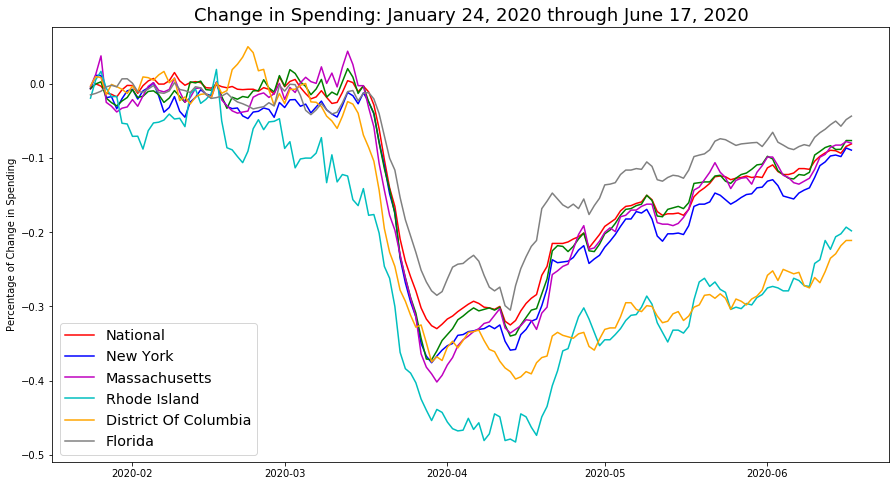

In [35]:
# Set line chart size
plt.figure(figsize=(15,8))

# Plot the the national, each state in the top 5, and fla numbers
nat, = plt.plot(dates, line_plot_df.loc['National',["spend_all"]], 
                color="r",label='National')

ny, = plt.plot(dates, line_plot_df.loc['New York',["spend_all"]], 
               color="b",label='New York')

nj, = plt.plot(dates, line_plot_df.loc['New Jersey',["spend_all"]], 
               color="g",label='New Jersey')

mass, = plt.plot(dates, line_plot_df.loc['Massachusetts',["spend_all"]], 
                 color="m",label='Massachusetts')

ri, = plt.plot(dates, line_plot_df.loc['Rhode Island',["spend_all"]], 
               color="c",label='Rhode Island')

doc, = plt.plot(dates, line_plot_df.loc['District Of Columbia',["spend_all"]], 
                color="orange",label='District Of Columbia')

fla, = plt.plot(dates, line_plot_df.loc['Florida',["spend_all"]], 
                color="gray",label='Florida')

# Set a title for the chart
plt.title("Change in Spending: January 24, 2020 through June 17, 2020", fontsize=18)

ax1 = plt.axes()
#ax1.xaxis.set_label_text('State')
ax1.yaxis.set_label_text('Percentage of Change in Spending')
    
# Create a legend for our chart
plt.legend(handles=[nat, ny, mass, ri, doc, fla], loc="best", fontsize="x-large")

# Show the chart
plt.show()

# Create a bar chart of the top 5 states and fla with national target line

In [36]:
# Create filtered and reduced df to create bar chart
date_filter = nat_state_append_df[nat_state_append_df["date"] == "2020-06-17"]
reduced_df = date_filter[['statename','spend_all']]
top5_states_spend_df = reduced_df[reduced_df['statename'].isin(['New York','New Jersey','Massachusetts','Florida','Rhode Island', 'District Of Columbia'])]
top5_states_spend_df = top5_states_spend_df.rename(columns={"spend_all": "Spending"})
top5_states_spend_df

,statename,Spending
7570,District Of Columbia,-0.2110
7571,Florida,-0.0432
7583,Massachusetts,-0.0797
7592,New Jersey,-0.0762
7594,New York,-0.0891
7601,Rhode Island,-0.1980


In [37]:
# Identify the national precentage of change in spending 
nat_spend_all_df = reduced_df[reduced_df["statename"] == "National"]
nat_spend_all_df

,statename,spend_all
145,National,-0.0807


C:\Users\felip\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


<function matplotlib.pyplot.show(*args, **kw)>

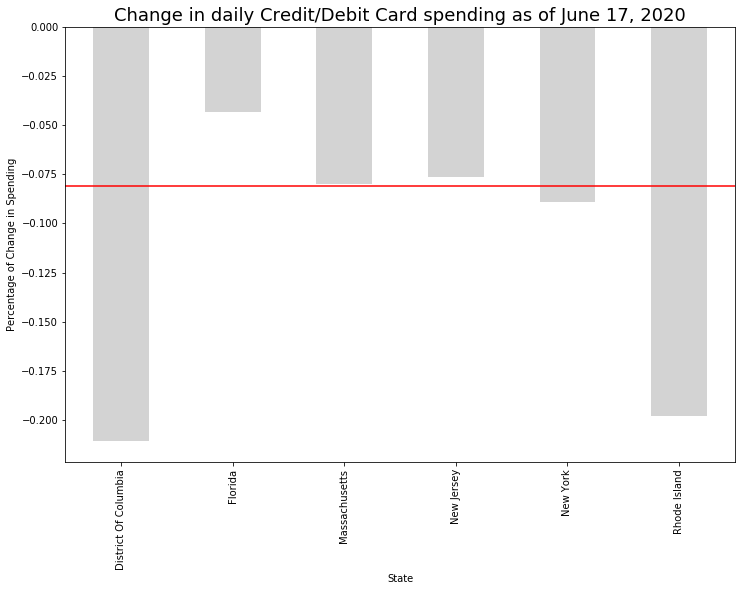

In [38]:
# Plot bar chart
top5_states_spend_df[['statename', 'Spending']].plot(x='statename', color='lightgray', kind='bar', figsize=(12,8))

# Set plot title
plt.title("Change in daily Credit/Debit Card spending as of June 17, 2020", fontsize=18)  

# Set x abdy axis titles
ax1 = plt.axes()
ax1.xaxis.set_label_text('State')
ax1.yaxis.set_label_text('Percentage of Change in Spending')

# Set National percentage of change, as of June 17, as target line
national = -0.0807
ax1.axhline(national, color="r")

#Remove legend from plot
plt.gca().get_legend().remove()

# Plot bar chart
plt.show

# Income Class Spending Line Chart

In [39]:
# Create national df based on date range
nat_df_daterange = nat_df[(nat_df['date'] >= '2020-01-24') & (nat_df['date'] <= '2020-06-17')]
nat_df_daterange.head()

,date,year,month,day,statefips,statename,case_rate,new_case_rate,spend_acf,spend_aer,spend_all,spend_all_inchigh,spend_all_inclow,spend_all_incmiddle,spend_apg,spend_grf,spend_hcs,spend_tws,stateabbrev,state_pop2019
0,2020-01-24,2020,1,24,0,National,0.000609,.,-0.00510,-0.02360,-0.006440,-0.005790,-0.00752,-0.00654,-0.00952,-0.00954,-0.00328,-0.005840,NaN,NaN
1,2020-01-25,2020,1,25,0,National,0.000914,.,0.00202,-0.01820,0.000432,-0.000625,-0.00201,0.00199,0.00400,0.00991,-0.00469,0.000839,NaN,NaN
2,2020-01-26,2020,1,26,0,National,0.001520,.,-0.00896,-0.02220,-0.002710,-0.000425,-0.00668,-0.00315,0.00152,0.01920,-0.00647,0.002720,NaN,NaN
3,2020-01-27,2020,1,27,0,National,0.001520,0.000174,-0.01350,-0.00762,-0.012200,-0.011000,-0.01590,-0.01190,-0.00671,-0.00980,-0.00755,-0.015700,NaN,NaN
4,2020-01-28,2020,1,28,0,National,0.001520,0.000174,-0.01550,-0.01270,-0.013700,-0.013300,-0.01630,-0.01320,-0.00492,-0.01820,-0.00243,-0.009870,NaN,NaN


In [40]:
# Select the columns needed to create the line plot
nat_incclass_df = nat_df_daterange[["date", "case_rate","spend_all" ,"spend_all_inchigh","spend_all_incmiddle","spend_all_inclow"]]
nat_incclass_df.head(10)

,date,case_rate,spend_all,spend_all_inchigh,spend_all_incmiddle,spend_all_inclow
0,2020-01-24,0.000609,-0.006440,-0.005790,-0.006540,-0.007520
1,2020-01-25,0.000914,0.000432,-0.000625,0.001990,-0.002010
2,2020-01-26,0.001520,-0.002710,-0.000425,-0.003150,-0.006680
3,2020-01-27,0.001520,-0.012200,-0.011000,-0.011900,-0.015900
4,2020-01-28,0.001520,-0.013700,-0.013300,-0.013200,-0.016300
5,2020-01-29,0.001520,-0.017300,-0.019000,-0.015800,-0.018300
6,2020-01-30,0.001830,-0.007700,-0.010200,-0.005530,-0.008840
7,2020-01-31,0.002130,-0.001750,-0.005530,0.000573,-0.000535
8,2020-02-01,0.002440,-0.001950,-0.005010,0.000756,-0.003440
9,2020-02-02,0.003350,-0.012500,-0.016600,-0.008760,-0.015400


In [57]:
# Printing the max and min for each income class 
inchigh_max = nat_incclass_df['spend_all_inchigh'].max()
inchigh_min = nat_incclass_df['spend_all_inchigh'].min()
incmid_max = nat_incclass_df['spend_all_incmiddle'].max()
incmid_min = nat_incclass_df['spend_all_incmiddle'].min()
inclow_max = nat_incclass_df['spend_all_inclow'].max()
inclow_min = nat_incclass_df['spend_all_inclow'].min()

print(f'High Income max {inchigh_max}')
print(f'Middle Income max {incmid_max}')
print(f'Low Income max {inclow_max}')

print(f'High Income min {inchigh_min}')
print(f'Middle Income min {incmid_min}')
print(f'Low Income min {inclow_min}')


High Income max 0.0255
Middle Income max 0.011000000000000001
Low Income max 0.00683
High Income min -0.364
Middle Income min -0.319
Low Income min -0.298


In [42]:
# Set the 'statename' to be the index for easy referencing of rows
nat_incclass_df = nat_incclass_df.set_index("date")

In [43]:
# Create a list of the dates to use for the x axis
dates = nat_df_daterange['date'].unique()

C:\Users\felip\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:18: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


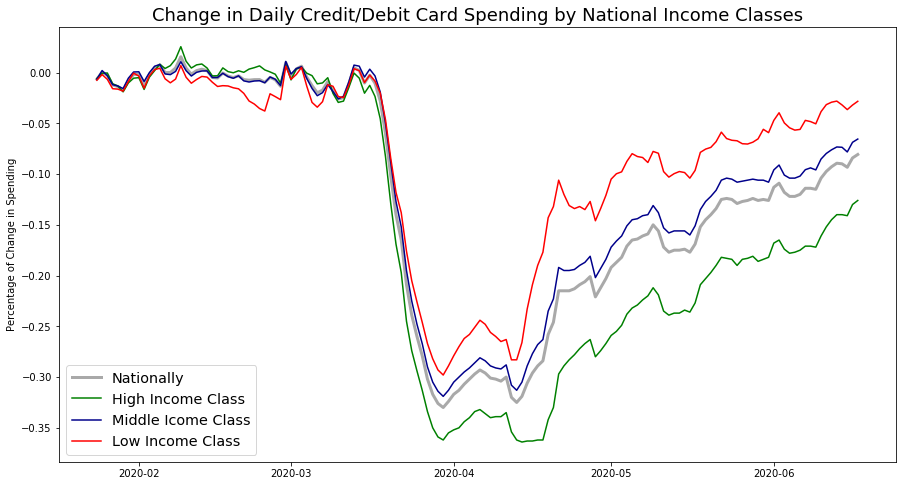

In [44]:
# Set line chart size
plt.figure(figsize=(15,8))

# Plot the national income classes
nat, = plt.plot(dates, nat_incclass_df.loc[:,["spend_all"]], 
                color="darkgray",label='Nationally', linewidth=3.0)

high, = plt.plot(dates, nat_incclass_df.loc[:,["spend_all_inchigh"]], 
                color="g",label='High Income Class')

middle, = plt.plot(dates, nat_incclass_df.loc[:,["spend_all_incmiddle"]], 
               color="darkblue",label='Middle Icome Class')

low, = plt.plot(dates, nat_incclass_df.loc[:,["spend_all_inclow"]], 
               color="r",label='Low Income Class')

# Set x abdy axis titles
ax1 = plt.axes()
ax1.yaxis.set_label_text('Percentage of Change in Spending')


# Set a title for the chart
plt.title("Change in Daily Credit/Debit Card Spending by National Income Classes", fontsize=18)    
    
# Create a legend for our chart
plt.legend(handles=[nat, high, middle, low], loc="best", fontsize='x-large')

# Show the chart
plt.show()


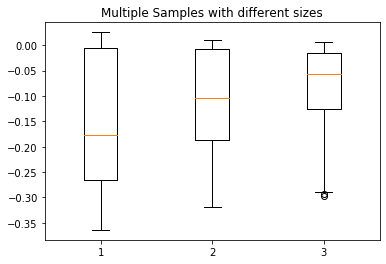

In [45]:
# Generate a box plot of the spending across income classes to determine outliers
inc_class_spend = [nat_incclass_df['spend_all_inchigh'], nat_incclass_df['spend_all_incmiddle'], nat_incclass_df['spend_all_inclow']]
fig7, ax7 = plt.subplots()
ax7.set_title('Multiple Samples with different sizes')
ax7.boxplot(inc_class_spend)
plt.show()

The correlation between both factors is -0.54
R-squared is: 0.162151


SpearmanrResult(correlation=-0.5437759763719036, pvalue=1.3141917186117054e-12)

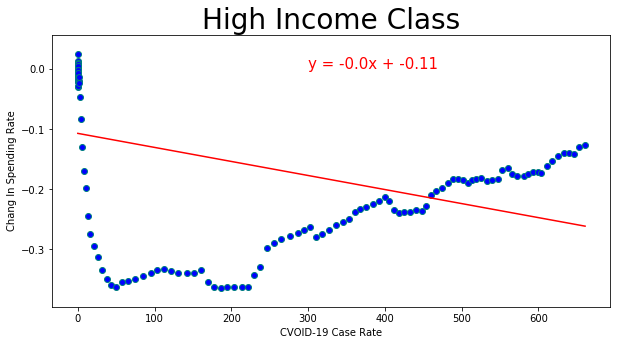

In [46]:
# High Income Correlation
x_values = nat_incclass_df.iloc[:,0]
y_values = nat_incclass_df.iloc[:,2]
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.figure(figsize=(10,5))
plt.scatter(x_values, y_values, marker='o', facecolors='b', edgecolors='teal')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(300,0),fontsize=15,color="red")
plt.title('High Income Class', fontsize=28)
plt.xlabel('CVOID-19 Case Rate')
plt.ylabel('Chang In Spending Rate')

correlation = stats.spearmanr(x_values, y_values)
print(f"The correlation between both factors is {round(correlation[0],2)}")
print(f'R-squared is: {round(rvalue**2,6)}')
correlation

The correlation between both factors is -0.52
R-squared is: 0.051201


SpearmanrResult(correlation=-0.523420764007749, pvalue=1.2143803353872137e-11)

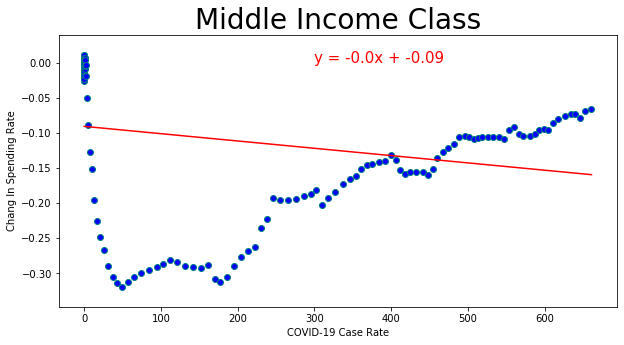

In [47]:
# Middle Income Correlation
x_values = nat_incclass_df.iloc[:,0]
y_values = nat_incclass_df.iloc[:,3]
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.figure(figsize=(10,5))
plt.scatter(x_values, y_values, marker='o', facecolors='b', edgecolors='teal')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(300,0),fontsize=15,color="red")
plt.title('Middle Income Class', fontsize=28)
plt.xlabel('COVID-19 Case Rate')
plt.ylabel('Chang In Spending Rate')

correlation = stats.spearmanr(x_values, y_values)
print(f"The correlation between both factors is {round(correlation[0],2)}")
print(f'R-squared is: {round(rvalue**2,6)}') 
correlation

The correlation between both factors is -0.5
R-squared is: 0.000327


SpearmanrResult(correlation=-0.49534548372744364, pvalue=2.0670504999130545e-10)

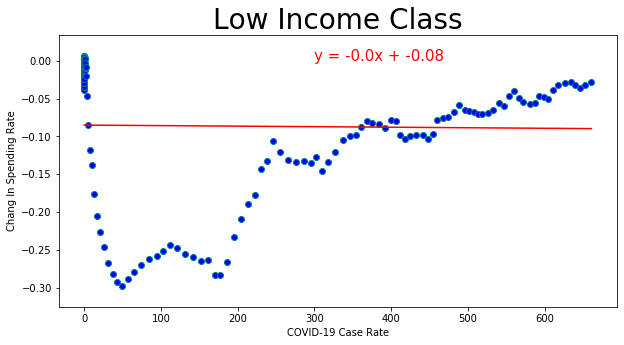

In [48]:
# Low Income Correlation
x_values = nat_incclass_df.iloc[:,0]
y_values = nat_incclass_df.iloc[:,4]
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.figure(figsize=(10,5))
plt.scatter(x_values, y_values, marker='o', facecolors='b', edgecolors='teal')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(300,0),fontsize=15,color="red")
plt.title('Low Income Class', fontsize=28)
plt.xlabel('COVID-19 Case Rate')
plt.ylabel('Chang In Spending Rate')

correlation = stats.spearmanr(x_values, y_values)
print(f"The correlation between both factors is {round(correlation[0],2)}")
print(f'R-squared is: {round(rvalue**2,6)}') 
correlation